# RAMP: Predicting flight ratings

The dataset:
[Flight Chronicles: An In-depth Analysis of British Airways Reviews (2012-2023)](https://www.kaggle.com/datasets/willianoliveiragibin/flight-chronicles)

In the realm of air travel, understanding passenger satisfaction through data analysis is pivotal for enhancing service quality and operational efficiency. This comprehensive exploration dives into a dataset encapsulating British Airways reviews from 2012 to 2023. The dataset, meticulously curated and processed, offers a rich foundation for extracting insights into passenger experiences and airline performance.

The goal of the data challenge is to predict the rating of a flight by a passenger, using the given flight information and reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
import warnings
warnings.filterwarnings("ignore")

We will be presentig some exploratory data analysis to help understand the dataset. However, you should do the preprocessing on your own when writing the classifier.

## **Exploratory data analysis**

## Loading the data

In [3]:
df = pd.read_csv('./data/train.csv')
df

,header,author,date,place,content,aircraft,traveller_type,seat_type,route,date_flown,recommended,trip_verified,rating,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,entertainment
0,seat is quite comfortable.,6 reviews,01-08-2019,Hong Kong,"Hong Kong to London Heathrow, this is a long...",Boeing 777-300ER,Family Leisure,Economy Class,Hong Kong to London,01-07-2019,yes,Verified,2,4,3,3,2,3,3
1,business class is very cramped,R Warren,29-05-2017,United Kingdom,Gatwick to Lima return in Business Class. No...,Boeing 777,Couple Leisure,Business Class,Gatwick to Lima,01-04-2017,yes,Verified,6,4,4,4,3,4,2
2,they were really good,Stew Oliver,11-10-2019,United Kingdom,Flew from London Heathrow to Abu Dhabi. Hones...,Boeing 787-900,Couple Leisure,Economy Class,London Heathrow to Abu Dhabi,01-10-2019,yes,Not Verified,8,5,5,5,5,4,4
3,delayed 1 hour due to no cleaners,T Madson,16-03-2017,United Kingdom,Gatwick to Mauritius. 12 hour flight delayed 1...,Boeing 777,Couple Leisure,Business Class,Gatwick to Mauritius,01-03-2017,no,Verified,2,3,4,3,1,3,3
4,cabin crew were friendly and professional,Alistair Baker,27-04-2020,United Kingdom,My wife and I used Avios and my BA Amex comp...,Boeing 747-400,Couple Leisure,Business Class,Las Vegas to London Heathrow,01-02-2020,yes,Verified,8,5,5,5,5,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,The service is really mediocre,K Malec,20-07-2023,United Kingdom,I don't understand why British Airways is cl...,Boeing 787,Solo Leisure,Economy Class,Seattle to London Heathrow,01-06-2023,no,Verified,1,2,2,1,3,3,3
843,little to no service,M Sissel,24-05-2017,Ireland,Kuala Lumpur to London. Very different from th...,Boeing 787-9,Solo Leisure,Economy Class,Kuala Lumpur to London,01-05-2017,yes,Verified,7,4,1,1,5,4,5
844,only saving grace was a superb cabin staff,S Morton,26-01-2020,United Kingdom,London Heathrow to Bangkok. Done this route a...,Boeing 777-200,Solo Leisure,Economy Class,London Heathrow to Bangkok,01-01-2020,no,Verified,1,2,4,4,4,2,1
845,Overall it was a great flight,Daniel Cook,02-06-2022,United Kingdom,"Recent trip to Boston, departing LHR T5. Gro...",Boeing 777-300ER,Business,Economy Class,London to Boston,01-05-2022,yes,Verified,3,4,5,5,5,3,-1


In [4]:
df.columns

Index(['header', 'author', 'date', 'place', 'content', 'aircraft',
       'traveller_type', 'seat_type', 'route', 'date_flown', 'recommended',
       'trip_verified', 'rating', 'seat_comfort', 'cabin_staff_service',
       'food_beverages', 'ground_service', 'value_for_money', 'entertainment'],
      dtype='object')

In [5]:
### Get general information on the dataset (ncol, nrow, nbr missing values, dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   header               847 non-null    object
 1   author               847 non-null    object
 2   date                 847 non-null    object
 3   place                847 non-null    object
 4   content              847 non-null    object
 5   aircraft             847 non-null    object
 6   traveller_type       846 non-null    object
 7   seat_type            847 non-null    object
 8   route                847 non-null    object
 9   date_flown           847 non-null    object
 10  recommended          847 non-null    object
 11  trip_verified        847 non-null    object
 12  rating               847 non-null    int64 
 13  seat_comfort         847 non-null    int64 
 14  cabin_staff_service  847 non-null    int64 
 15  food_beverages       847 non-null    int64 
 16  ground_s

In [6]:
df.describe()

,rating,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,entertainment
count,847.000000,847.000000,847.00000,847.000000,847.000000,847.000000,847.000000
mean,4.175915,2.861865,3.27863,2.382527,3.074380,2.779221,1.495868
std,3.274803,1.381590,1.51050,1.673766,1.394143,1.379397,2.093482
min,1.000000,-1.000000,-1.00000,-1.000000,-1.000000,1.000000,-1.000000
25%,1.000000,2.000000,2.00000,1.000000,2.000000,1.000000,-1.000000
50%,3.000000,3.000000,4.00000,2.000000,3.000000,3.000000,1.000000
75%,7.000000,4.000000,5.00000,4.000000,4.000000,4.000000,3.000000
max,10.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000


## Labels
The target variable is in the column rating.

In [7]:
df['rating'].unique()

array([ 2,  6,  8,  1,  5,  3, 10,  7,  9,  4], dtype=int64)

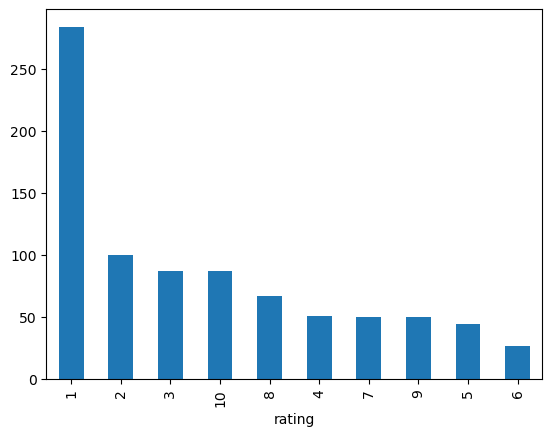

In [8]:
ax_pub = df.rating.value_counts(normalize=False).plot(kind='bar',)

## Clean text data

Handling text data in any Machine Learning project can be a difficult task.
Valuable information might be present in text that can't be used by a model in its raw form since models can only take numerical data as input.

To clean variables containing large amounts of text, you can try the following methods:
- Lowercasing each word
- Removing stop words with little significance (examples: a, an, the, and, but, ...)
- Spell checking and correction
- Removing punctuation and special characters

In [9]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words(fileids=('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khale\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Regex pattern to remove punctuation
pattern = r'[\[\]()\-:;",/\.\.\.‘\'’?!“&]'

In [11]:
clean_content = []
for content in df["content"].to_list():
    # remove punctuation, numbers
    content = content.lower()
    content = re.sub(pattern,"",content).replace("  "," ")

    # remove stopwords
    clean_text = [text for text in content.split(" ") if text not in stopwords]
    clean_text = " ".join(clean_text)
    clean_content.append(clean_text)

In [12]:
df["content"] = clean_content

## **Data Analysis**

## Visualize text data

In [13]:
dict_content_rating = dict()
for rating in df["rating"].unique():
    list_content = df.loc[df["rating"]==rating,"content"].to_list()
    dict_content_rating[rating] = " ".join(list_content)

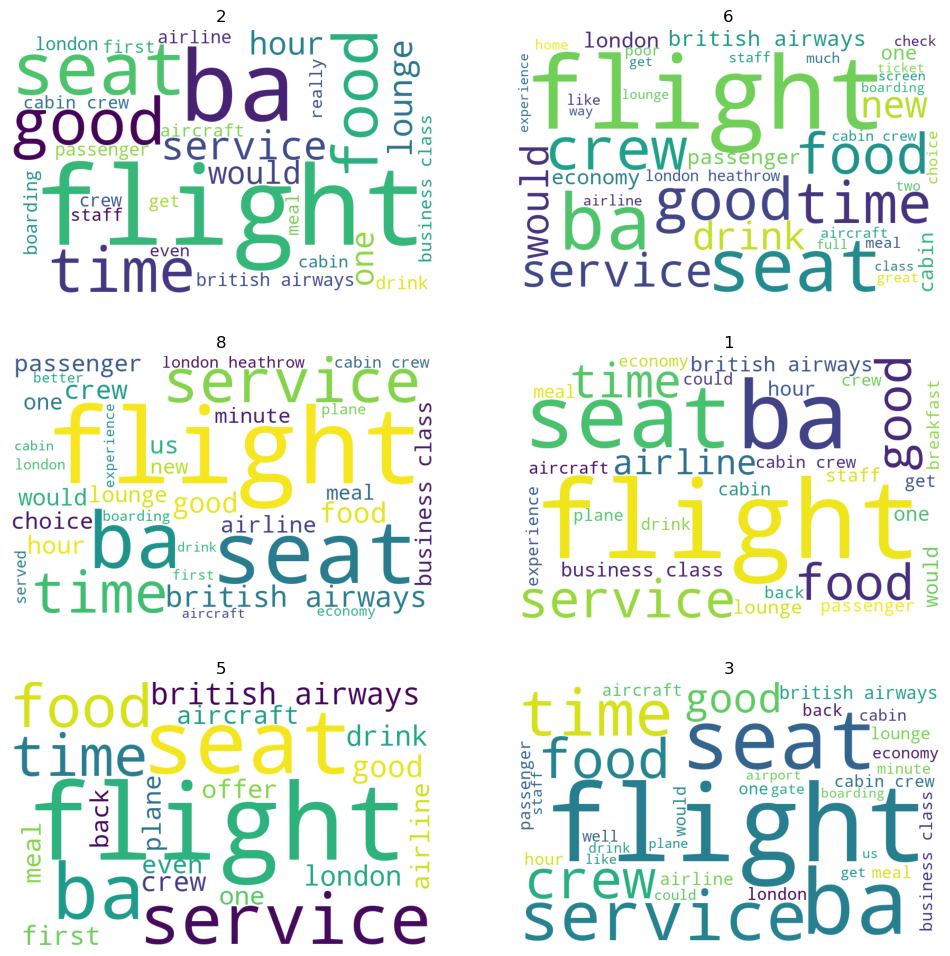

In [14]:
#Code to run to create wordclouds

from wordcloud import WordCloud

top_words_track = []
f, axes = plt.subplots(3,2,figsize=(12, 12))
axes = axes.flatten()

for rating,ax in zip(df["rating"].unique(),axes):
    wordcloud = WordCloud(width = 800, height = 500,
                          background_color ='white',
                          stopwords = stopwords,
                          min_font_size = 25).generate(dict_content_rating[rating])

    top_words_track.append(list(wordcloud.words_.keys())[0])

    ax.imshow(wordcloud)
    ax.set_title(rating)
    ax.axis("off")

## Correlation matrix

In [15]:
numerical_var = ["seat_comfort","cabin_staff_service","food_beverages","ground_service","value_for_money","entertainment", "rating"]

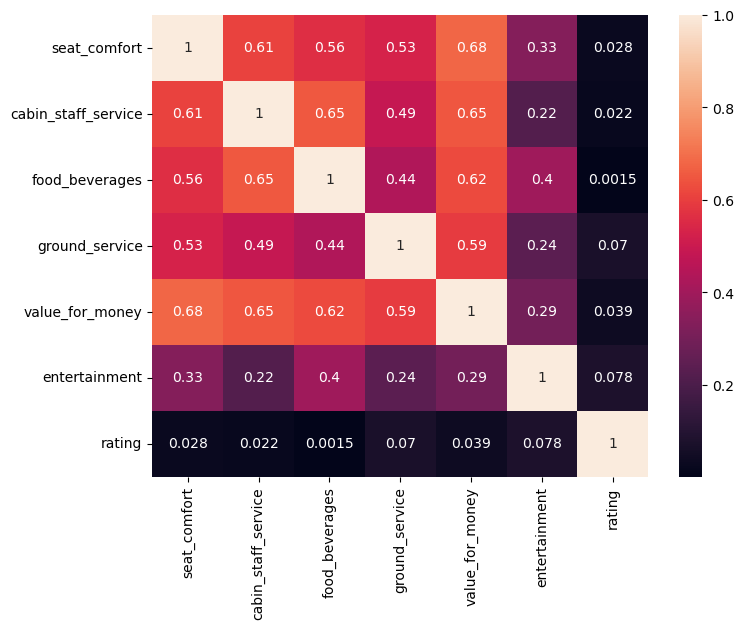

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_var].corr().abs(),annot=True);

## Categorical and Categorical

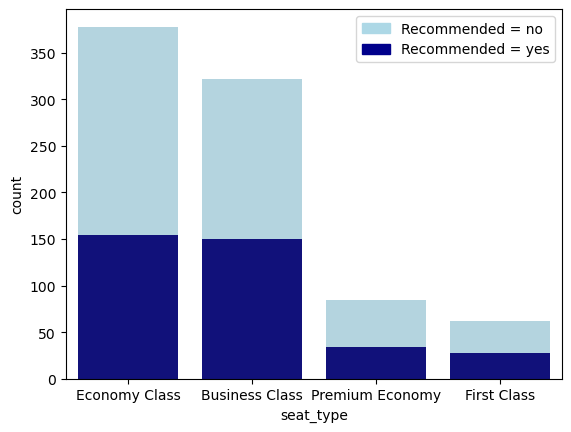

In [17]:
import matplotlib.patches as mpatches

# create dataframe to count track_genre/mode
df_SeatType_recommended = df[["seat_type","recommended"]].value_counts().to_frame("count").reset_index()

# create barplots
bar1 = sns.barplot(data=df["seat_type"].value_counts().to_frame("count").reset_index(names="seat_type"), x="seat_type", y="count", color='lightblue');
bar2 = sns.barplot(data=df_SeatType_recommended.loc[df_SeatType_recommended["recommended"]=="yes"], x="seat_type", y="count", color='darkblue',);

# add legends
bottom_bar = mpatches.Patch(color='darkblue', label='Recommended = yes')
top_bar = mpatches.Patch(color='lightblue', label='Recommended = no')
plt.legend(handles=[top_bar, bottom_bar])

plt.show()

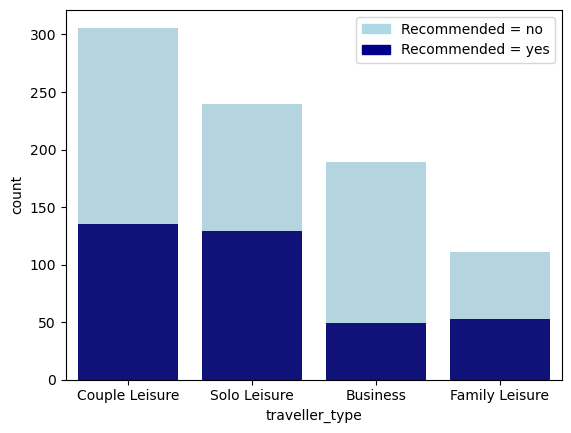

In [18]:
import matplotlib.patches as mpatches

# create dataframe to count track_genre/mode
df_TravellerType_recommended = df[["traveller_type","recommended"]].value_counts().to_frame("count").reset_index()

# create barplots
bar1 = sns.barplot(data=df["traveller_type"].value_counts().to_frame("count").reset_index(names="traveller_type"), x="traveller_type", y="count", color='lightblue');
bar2 = sns.barplot(data=df_TravellerType_recommended.loc[df_TravellerType_recommended["recommended"]=="yes"], x="traveller_type", y="count", color='darkblue',);

# add legends
bottom_bar = mpatches.Patch(color='darkblue', label='Recommended = yes')
top_bar = mpatches.Patch(color='lightblue', label='Recommended = no')
plt.legend(handles=[top_bar, bottom_bar])

plt.show()

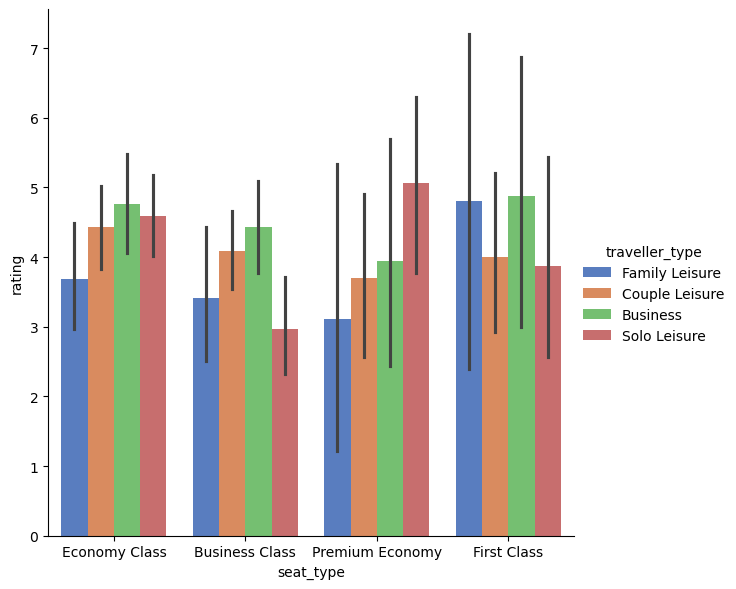

In [19]:
_ = sns.catplot(
    x="seat_type", y="rating", hue="traveller_type", data=df,
    height=6, kind="bar", palette="muted"
)

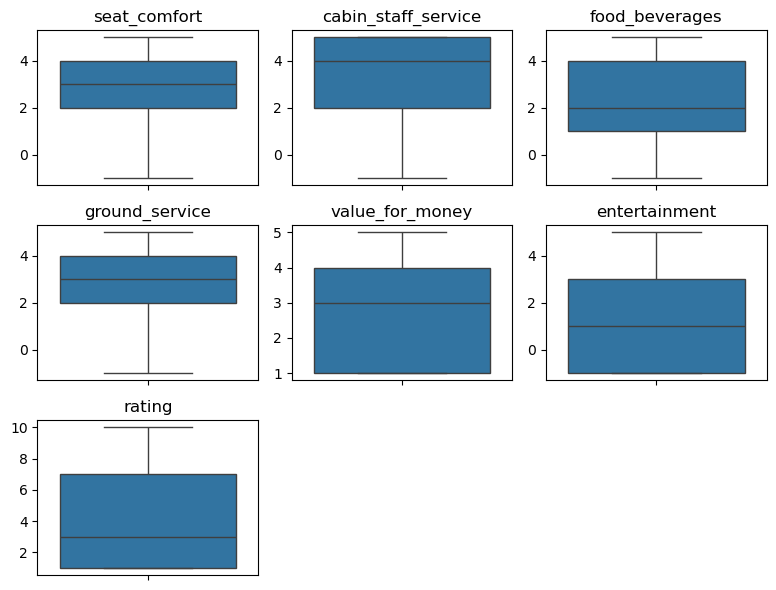

In [20]:
plt.figure(figsize=(8,6))
for c,var in enumerate(numerical_var):
  plt.subplot(3,3,c+1)
  ax = sns.boxplot(data=df[numerical_var], y=var)
  ax.ticklabel_format(style='plain', axis='y')
  plt.title(str(var))
  plt.xlabel("")
  plt.ylabel("")

plt.tight_layout()

## Submitting to the online challenge: [ramp.studio](https://ramp.studio) <a class="anchor" id="submitting"></a>

Once you found a good model, you can submit them to [ramp.studio](https://www.ramp.studio) to enter the online challenge. First, if it is your first time using the RAMP platform, [sign up](https://www.ramp.studio/sign_up), otherwise [log in](https://www.ramp.studio/login). Then sign up to the event [tephra](http://www.ramp.studio/events/tephra_datacamp2023). Both signups are controled by RAMP administrators, so there **can be a delay between asking for signup and being able to submit**.

Once your signup request is accepted, you can go to your [sandbox](https://www.ramp.studio/events/tephra_datacamp2023/sandbox) and write the code for your classifier directly on the browser. You can also create a new folder `my_submission` in the `submissions` folder containing `classifier.py` and upload this file directly. You can check the starting-kit ([`classifier.py`](/edit/submissions/starting_kit/classifier.py)) for an example. The submission is trained and tested on our backend in the similar way as `ramp-test` does it locally. While your submission is waiting in the queue and being trained, you can find it in the "New submissions (pending training)" table in [my submissions](https://www.ramp.studio/events/tephra_datacamp2023/my_submissions). Once it is trained, your submission shows up on the [public leaderboard](https://www.ramp.studio/events/tephra_datacamp2023/leaderboard). 
If there is an error (despite having tested your submission locally with `ramp-test`), it will show up in the "Failed submissions" table in [my submissions](https://www.ramp.studio/events/tephra_datacamp2023/my_submissions). You can click on the error to see part of the trace.

The data set we use at the backend is usually different from what you find in the starting kit, so the score may be different.

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, etc., _locally_, and checking them with `ramp-test`. The script prints mean cross-validation scores.

The official score in this RAMP (the first score column on the [leaderboard](http://www.ramp.studio/events/tephra_datacamp2023/leaderboard)) is the balenced accuracy score (`bal_acc`). When the score is good enough, you can submit it at the RAMP.

Here is the script proposed as the starting_kit:

In [21]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


class Classifier(BaseEstimator):
    def __init__(self):
        self.transformer = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler()),
            ]
        )
        self.model = LogisticRegression(max_iter=500)
        self.pipe = make_pipeline(self.transformer, self.model)

    def fit(self, X, y):
        X = X.drop(["groups"], axis=1)
        self.pipe.fit(X, y)

    def predict(self, X):
        X = X.drop(["groups"], axis=1)
        return self.pipe.predict(X)

    def predict_proba(self, X):
        X = X.drop(["groups"], axis=1)
        return self.pipe.predict_proba(X)

You can test your solution locally by running the ramp-test command followed by --submission <my_submission folder>.
Here is an example with the starting_kit submission:

In [22]:
!ramp-test --submission starting_kit

Testing Flight Chronicles - Predicting Flight ratings
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions\starting_kit ...
CV fold 0
	score  bal_acc    acc      time
	train    1.000  1.000  0.362169
	valid    0.105  0.173  0.020257
	test     0.110  0.203  0.014026
CV fold 1
	score  bal_acc    acc      time
	train    1.000  1.000  0.206488
	valid    0.086  0.191  0.021703
	test     0.104  0.170  0.010840
CV fold 2
	score  bal_acc    acc      time
	train    1.000  1.000  0.210725
	valid    0.084  0.266  0.022487
	test     0.108  0.278  0.014868
----------------------------
Mean CV scores
----------------------------
	score         bal_acc             acc        time
	train       1.0 ± 0.0       1.0 ± 0.0  0.3 ± 0.07
	valid  0.092 ± 0.0092   0.21 ± 0.0401   0.0 ± 0.0
	test   0.108 ± 0.0024  0.217 ± 0.0454   0.0 ± 0.0
----------------------------
Bagged scores
----------------------------
	score  bal_acc    acc
	valid    0.092  0.210
	test     0.129  0.278


## More information

See the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html) for more details.

## Questions

Questions related to the starting kit should be asked on the [issue tracker](https://github.com/ramp-kits/tephra/issues).